## Generate Random Latitudes and Longitudes

In [7]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [8]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
#unpack latitudes and longitudes to a list so you only have to generate it 1x.
coordinates = list(lat_lngs)


## Generate Random World Cities

In [10]:
#Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count.
len(cities)


636

## Make an API Call

In [11]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

In [12]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


## Get City Weather Data

In [13]:
#Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
#Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
 
    # Run API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marataizes
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | chicama
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | nelson bay
Processing Record 7 of Set 1 | murupara
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | tuatapere
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | alappuzha
Processing Record 12 of Set 1 | durant
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | benguela
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | emiliano zapata
Processing Record 17 of Set 1 | alindao
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | lagoa
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | panzhihua
Processing Record 22 of Set 1 | esperance
Processing Record 23 o

Processing Record 40 of Set 4 | vila velha
Processing Record 41 of Set 4 | fortuna
Processing Record 42 of Set 4 | marzuq
Processing Record 43 of Set 4 | beloha
Processing Record 44 of Set 4 | cherskiy
Processing Record 45 of Set 4 | channel-port aux basques
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | ca mau
Processing Record 48 of Set 4 | ende
Processing Record 49 of Set 4 | mezen
Processing Record 50 of Set 4 | kaitangata
Processing Record 1 of Set 5 | tautira
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | kautokeino
Processing Record 4 of Set 5 | bojnurd
Processing Record 5 of Set 5 | nyurba
Processing Record 6 of Set 5 | sakakah
Processing Record 7 of Set 5 | takayama
Processing Record 8 of Set 5 | zhovti vody
Processing Record 9 of Set 5 | nanortalik
Processing Record 10 of Set 5 | maarianhamina
Processing Record 11 of Set 5 | praia da vitoria
Processing Record 12 of Set 5 | rosetta
Processing Record 13 of Set 5 | anadyr
Pro

Processing Record 30 of Set 8 | scarborough
Processing Record 31 of Set 8 | broken hill
Processing Record 32 of Set 8 | talaya
Processing Record 33 of Set 8 | launceston
Processing Record 34 of Set 8 | chiojdu
Processing Record 35 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 36 of Set 8 | okato
Processing Record 37 of Set 8 | lasa
Processing Record 38 of Set 8 | nishihara
Processing Record 39 of Set 8 | yabassi
Processing Record 40 of Set 8 | san vicente
Processing Record 41 of Set 8 | booue
Processing Record 42 of Set 8 | souillac
Processing Record 43 of Set 8 | paradwip
City not found. Skipping...
Processing Record 44 of Set 8 | carballo
Processing Record 45 of Set 8 | luziania
Processing Record 46 of Set 8 | gajendragarh
Processing Record 47 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 48 of Set 8 | the pas
Processing Record 49 of Set 8 | srivardhan
Processing Record 50 of Set 8 | cap-aux-meules
Processing Record 1 of Set 9 | saint-august

Processing Record 13 of Set 12 | saint-joseph
Processing Record 14 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 15 of Set 12 | puerto maldonado
Processing Record 16 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 17 of Set 12 | rocha
Processing Record 18 of Set 12 | alekseyevsk
Processing Record 19 of Set 12 | tubruq
City not found. Skipping...
Processing Record 20 of Set 12 | pangai
Processing Record 21 of Set 12 | morro bay
Processing Record 22 of Set 12 | pressbaum
Processing Record 23 of Set 12 | afua
Processing Record 24 of Set 12 | excelsior springs
Processing Record 25 of Set 12 | mahibadhoo
Processing Record 26 of Set 12 | port-gentil
Processing Record 27 of Set 12 | te anau
Processing Record 28 of Set 12 | cockburn town
Processing Record 29 of Set 12 | paka
Processing Record 30 of Set 12 | pundaguitan
Processing Record 31 of Set 12 | lata
Processing Record 32 of Set 12 | san pedro
Processing Record 33 of Set 12 | biloela
Processing Re

In [15]:
print(len(city_data))

584


## Create DataFrame of City Weather Data

In [16]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Marataizes,-21.0433,-40.8244,79.27,83,16,15.08,BR,2022-01-29 21:22:29
1,Arraial Do Cabo,-22.9661,-42.0278,75.16,83,75,9.22,BR,2022-01-29 21:18:50
2,Chicama,-7.8447,-79.1469,68.54,62,81,10.83,PE,2022-01-29 21:22:29
3,Punta Arenas,-53.1500,-70.9167,53.71,54,75,17.27,CL,2022-01-29 21:22:30
4,Albany,42.6001,-73.9662,15.58,61,100,5.01,US,2022-01-29 21:22:05
5,Nelson Bay,-32.7167,152.1500,77.95,77,91,1.99,AU,2022-01-29 21:19:17
6,Murupara,-38.4667,176.7000,70.29,58,39,2.98,NZ,2022-01-29 21:22:30
7,Busselton,-33.6500,115.3333,67.05,91,5,14.34,AU,2022-01-29 21:22:31
8,Tuatapere,-46.1333,167.6833,57.90,93,100,5.01,NZ,2022-01-29 21:22:31
9,Avarua,-21.2078,-159.7750,82.45,78,65,11.50,CK,2022-01-29 21:22:32


In [18]:
#assign variable to hold new order of columns
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#apply new order to df
city_data_df = city_data_df[new_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Marataizes,BR,2022-01-29 21:22:29,-21.0433,-40.8244,79.27,83,16,15.08
1,Arraial Do Cabo,BR,2022-01-29 21:18:50,-22.9661,-42.0278,75.16,83,75,9.22
2,Chicama,PE,2022-01-29 21:22:29,-7.8447,-79.1469,68.54,62,81,10.83
3,Punta Arenas,CL,2022-01-29 21:22:30,-53.1500,-70.9167,53.71,54,75,17.27
4,Albany,US,2022-01-29 21:22:05,42.6001,-73.9662,15.58,61,100,5.01


In [19]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plots

In [20]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

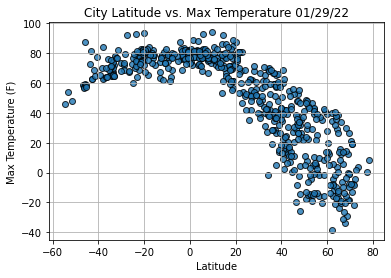

In [22]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

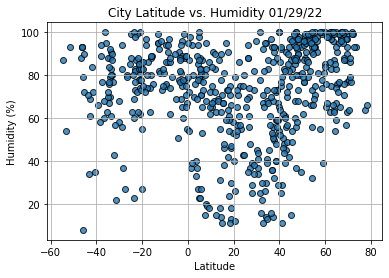

In [23]:
#Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

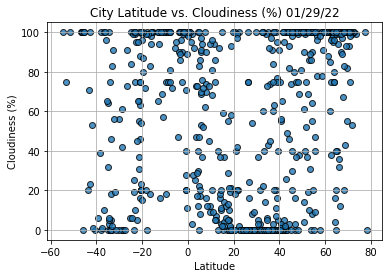

In [25]:
#Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

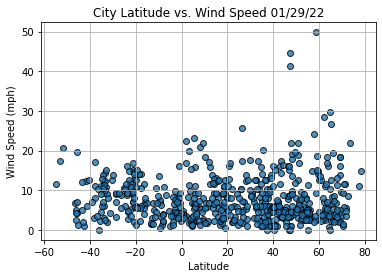

In [26]:
#Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()